In [1]:
#Brittany Roberts
#DSC410
#Exercise 10.2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

df = pd.read_csv('https://raw.githubusercontent.com/bellevue-university/dsc410/main/12%20Week/week_6/data/startups_profit.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,"$192,261.83"
1,162597.70,151377.59,443898.53,California,"$191,792.06"
2,153441.51,101145.55,407934.54,FL,"$191,050.39"
3,144372.41,118671.85,383199.62,New York,"$182,901.99"
4,142107.34,91391.77,366168.42,FL,"$166,187.94"
5,131876.90,99814.71,362861.36,New York,"$156,991.12"
6,134615.46,147198.87,127716.82,California,"$156,122.51"
7,130298.13,145530.06,323876.68,FL,"$155,752.60"
8,120542.52,148718.95,311613.29,New York,"$152,211.77"
9,123334.88,108679.17,304981.62,California,"$149,759.96"


In [2]:
# Rename Profit column to remove spaces surrounding column name

df.rename(columns= {' Profit ':'Profit'}, inplace=True)
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [3]:
# remove special characters from Profit column

df['Profit'] = df['Profit'].astype(str).str.replace('[(,),$,%]', '',regex=True)
df['Profit'] = df['Profit'].astype(float)

In [4]:
#label encoding as there is no levels between states

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [5]:
df['encoded_State'] = le.fit_transform(df['State'])
df

,R&D Spend,Administration,Marketing Spend,State,Profit,encoded_State
0,165349.20,136897.80,471784.10,New York,192261.83,2
1,162597.70,151377.59,443898.53,California,191792.06,0
2,153441.51,101145.55,407934.54,FL,191050.39,1
3,144372.41,118671.85,383199.62,New York,182901.99,2
4,142107.34,91391.77,366168.42,FL,166187.94,1
5,131876.90,99814.71,362861.36,New York,156991.12,2
6,134615.46,147198.87,127716.82,California,156122.51,0
7,130298.13,145530.06,323876.68,FL,155752.60,1
8,120542.52,148718.95,311613.29,New York,152211.77,2
9,123334.88,108679.17,304981.62,California,149759.96,0


In [6]:
# correlation of columns

df.corr()

,R&D Spend,Administration,Marketing Spend,Profit,encoded_State
R&D Spend,1.000000,0.241955,0.724248,0.972900,0.104685
Administration,0.241955,1.000000,-0.032154,0.200717,0.011847
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,0.077670
Profit,0.972900,0.200717,0.747766,1.000000,0.101796
encoded_State,0.104685,0.011847,0.077670,0.101796,1.000000


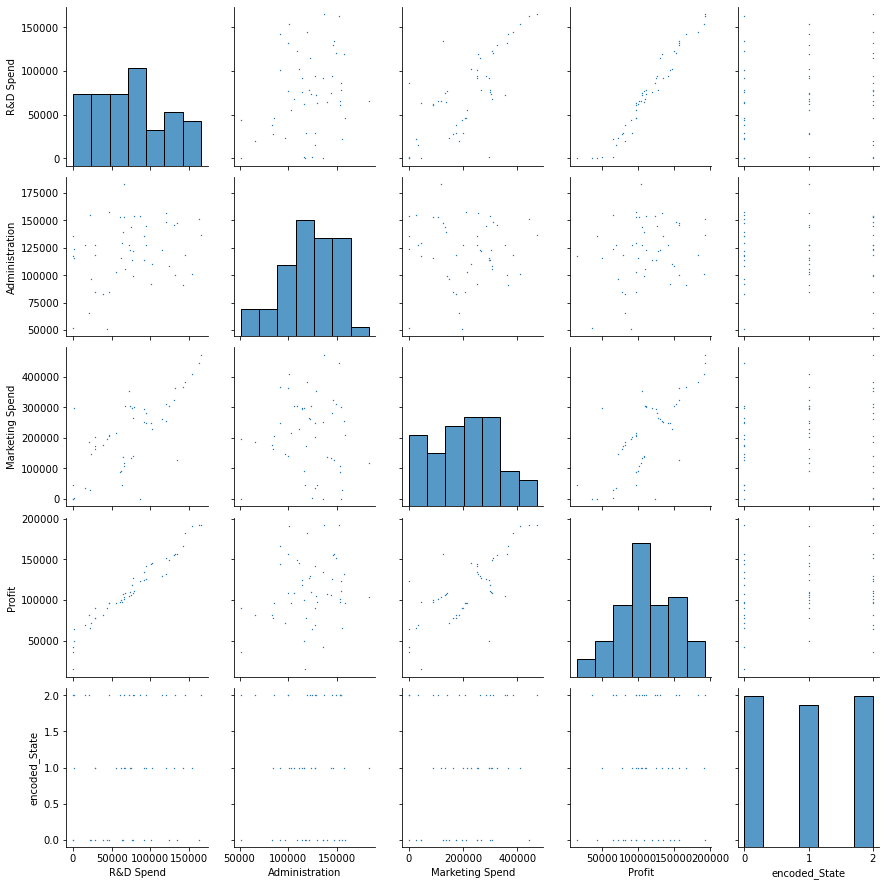

In [7]:
# bivariate EDA for numerical features

sns.pairplot(df, plot_kws={'s': 2});

In [8]:
#Preprocessing for model

X = df[['R&D Spend', 'Administration', 'Marketing Spend', 'encoded_State']]
y = df['Profit']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [10]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [11]:
# Neural Network model

nn = MLPRegressor(max_iter=300, activation = 'relu', hidden_layer_sizes = (100,100))

In [12]:
nn.fit(X_train, y_train)

nn_pred = nn.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, nn_pred)
mae = mean_absolute_error(y_test, nn_pred)
r2 = r2_score(y_test, nn_pred)

print('MSE:', mse)
print('MAE:', mae)
print('R2 score:', r2)

MSE: 1982415448.1628194
MAE: 32647.89004089408
R2 score: -0.6919409784788471


I noticed before running the model that the R&D spend column had a high correlation and linear relationship with Profit so I wanted to see how the model would do with just that column.

In [17]:
#Preprocessing for model

X = df[['R&D Spend']]
y = df['Profit']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [19]:
# Neural Network model

nn = MLPRegressor(max_iter=300, activation = 'relu', hidden_layer_sizes = (100,100))

In [20]:
nn.fit(X_train, y_train)

nn_pred = nn.predict(X_test)

In [21]:
mse = mean_squared_error(y_test, nn_pred)
mae = mean_absolute_error(y_test, nn_pred)
r2 = r2_score(y_test, nn_pred)

print('MSE:', mse)
print('MAE:', mae)
print('R2 score:', r2)

MSE: 496891529.2952355
MAE: 14735.601687724173
R2 score: 0.5759157642497434


Comparing the two models, you can see that the model using just the R&D spend column is more accurate than when all categories were used.  If I were to be using this for a project, I would choose the second model to move forward with.